In [92]:
# load JSON
import json
import pandas as pd
import numpy as np
 
data = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
data = data.sort_values(by=['ds'])

df = data

df['year'], df['month'], df['day'], df['weekday'] = df['ds'].dt.year, df['ds'].dt.month, df['ds'].dt.day, df['ds'].dt.weekday
df['hour'] = df['ds'].dt.hour
df['monthday'] = df['ds'].dt.date
df.head()

,ds,y,year,month,day,weekday,hour,monthday
33509,2012-12-31 19:00:00,26.0,2012,12,31,0,19,2012-12-31
29997,2012-12-31 20:00:00,18.0,2012,12,31,0,20,2012-12-31
30093,2012-12-31 21:00:00,45.0,2012,12,31,0,21,2012-12-31
17776,2012-12-31 22:00:00,22.0,2012,12,31,0,22,2012-12-31
12561,2012-12-31 23:00:00,15.0,2012,12,31,0,23,2012-12-31


5
8760
8759
8760
8760
8759
8737
6011


([<matplotlib.axis.XTick at 0x7f622be595d0>,
 <a list of 8 Text xticklabel objects>)

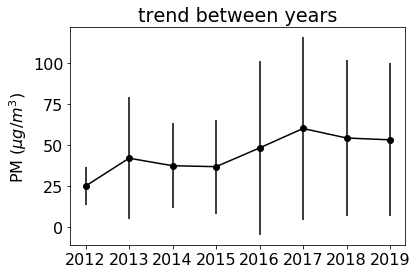

In [91]:
# trend across different years
yArr = list(range(2012,2020))

import matplotlib
import matplotlib.pyplot as plt

font = {'size': 16,             # font setting
       'weight':'normal'}       # font setting
matplotlib.rc('font', **font)   # font setting

pd.plotting.register_matplotlib_converters() # this resolves some issues with data type
aArr = []
sArr = []
counter = -1
for i in yArr:
    counter = counter + 1 
    dplot = df.loc[df['year'] == i]
    a = pd.DataFrame.mean(dplot.y)
    s = pd.DataFrame.std(dplot.y)
    aArr.append(a)
    sArr.append(s)
plt.errorbar(yArr, aArr, yerr=sArr, fmt='o-k');
plt.title('trend between years')
plt.ylabel('PM $(\u03BCg/m^3)$')
plt.xticks(yArr)

([<matplotlib.axis.XTick at 0x7f62328c8650>,
 <a list of 12 Text xticklabel objects>)

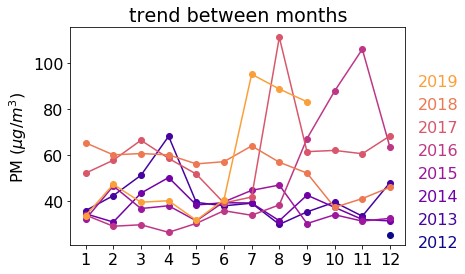

In [58]:
# trend across different months
import matplotlib.cm as cm
colors = cm.plasma(np.linspace(0, 1, 10))
counter = -1
mArr = list(range(1,13))

for i in yArr:
    counter = counter + 1 
    dplot = df.loc[df['year'] == i]
    aArr = []
    sArr = []
    for j in mArr:
        dplot2 = dplot.loc[dplot['month']==j]
        a = pd.DataFrame.mean(dplot2.y)
        s = pd.DataFrame.std(dplot2.y)
        aArr.append(a)
        sArr.append(s)
    plt.errorbar(mArr, aArr, np.zeros(12), color=colors[counter],fmt='o-'); # yerr=sArr
    plt.text(13,20+counter*10,i,color=colors[counter])
plt.title('trend between months')
plt.ylabel('PM $(\u03BCg/m^3)$')
plt.xticks(range(1,13))    

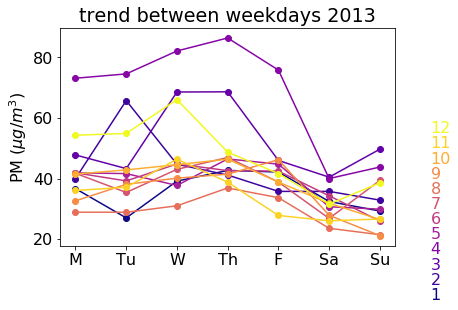

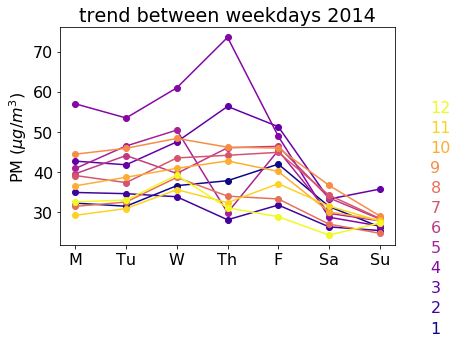

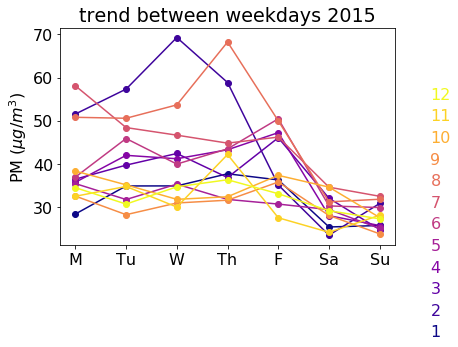

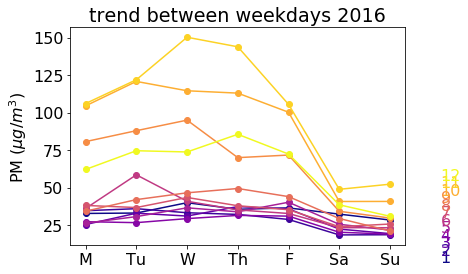

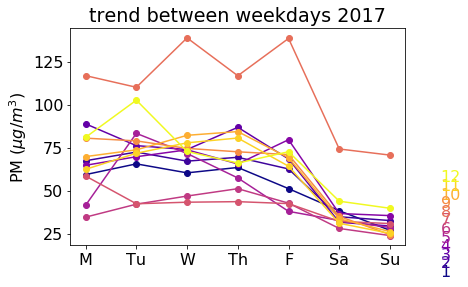

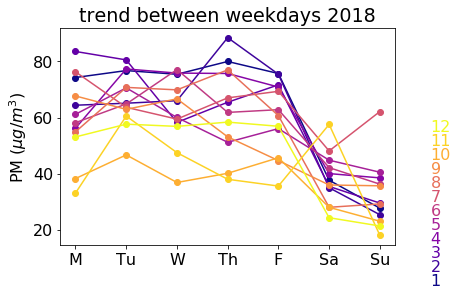

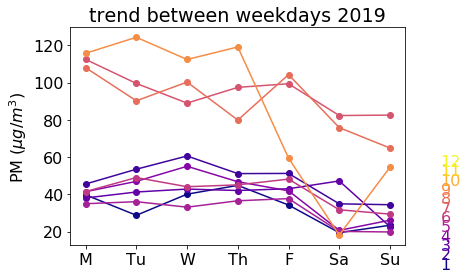

In [90]:
# trends across different weekdays
yArr = list(range(2013,2020)) # 2012 only has 5 samples
wArr = list(range(0,7))
for i in yArr:
    dplot = df.loc[df['year'] == i]
    colors = cm.plasma(np.linspace(0, 1, 12))
    fig = plt.figure(i)
    counter = -1
    
    for j in mArr:
        counter = counter + 1
        dplot2 = dplot.loc[dplot['month']==j]
        aArr = []
        sArr = []
        
        for k in wArr:

            dplot3 = dplot2.loc[dplot2['weekday']==k]
            a = pd.DataFrame.mean(dplot3.y)
            s = pd.DataFrame.std(dplot3.y)
            aArr.append(a)
            sArr.append(s)
            
        plt.errorbar(wArr, aArr, np.zeros(7), color=colors[counter],fmt='o-'); # yerr=sArr
        plt.text(7,counter*5,j,color=colors[counter])\
        
    plt.title('trend between weekdays ' + str(i))
    plt.ylabel('PM $(\u03BCg/m^3)$')
    plt.xticks(wArr,labels=('M','Tu','W','Th','F','Sa','Su'))    

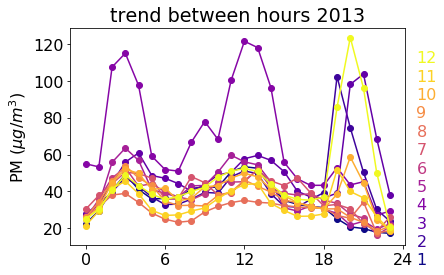

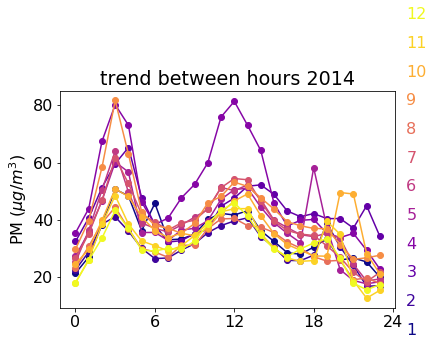

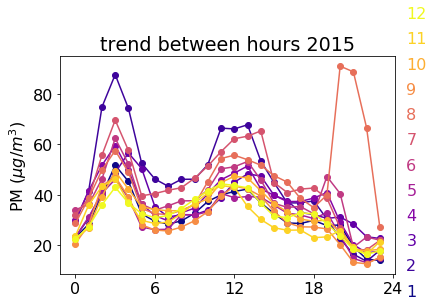

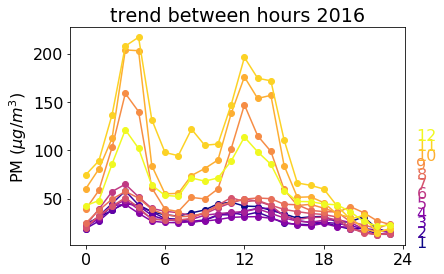

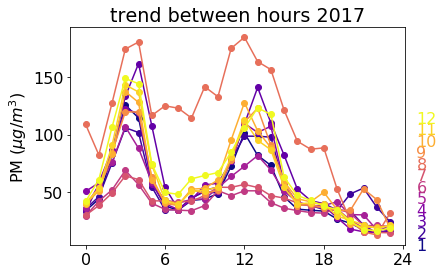

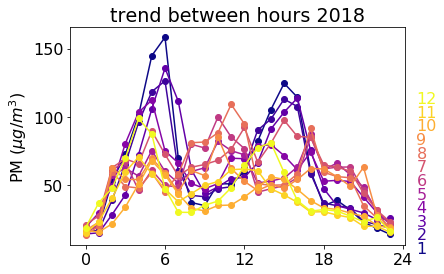

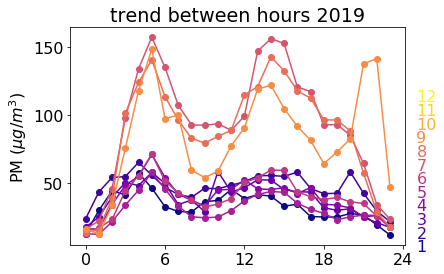

In [102]:
# trends across hours 
hArr = list(range(0,24))

yArr = list(range(2013,2020)) # 2012 only has 5 samples
for i in yArr:
    dplot = df.loc[df['year'] == i]
    colors = cm.plasma(np.linspace(0, 1, 12))
    fig = plt.figure(i)
    counter = -1
    
    for j in mArr:
        counter = counter + 1
        dplot2 = dplot.loc[dplot['month']==j]
        aArr = []
        sArr = []

        for k in hArr:

            dplot3 = dplot2.loc[dplot2['hour']==k]
            a = pd.DataFrame.mean(dplot3.y)
            s = pd.DataFrame.std(dplot3.y)
            aArr.append(a)
            sArr.append(s)

        plt.errorbar(hArr, aArr, np.zeros(24), color=colors[counter],fmt='o-'); # yerr=sArr
        plt.text(25,counter*10,j,color=colors[counter])\

    plt.title('trend between hours ' + str(i))
    plt.ylabel('PM $(\u03BCg/m^3)$')
    plt.xticks([0,6,12,18,24])